In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

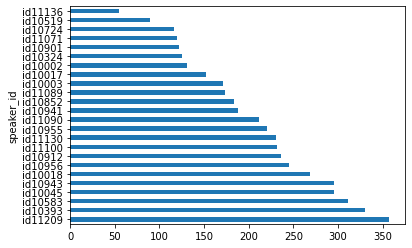

In [2]:
df = pd.DataFrame([], columns=["speaker_id", "filepath"])
root = r"..\data\vox1_indian"
for x in os.scandir(root):
    if x.is_dir():
        for y in os.scandir(x):
            for z in os.scandir(y):
                df.loc[len(df)] = [x.name, z.path]

df.value_counts("speaker_id").plot(kind="barh")
plt.show()

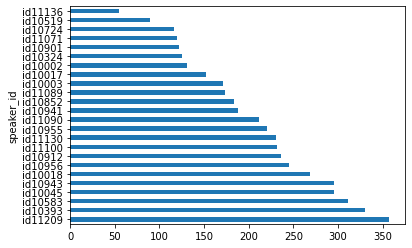

In [3]:
grps = df.groupby("speaker_id")
df = pd.DataFrame([], columns=["speaker_id", "filepath"])
for x, y in grps:
    df = pd.concat([df, y.sample(frac=1)[:400]], ignore_index=True)

df.value_counts("speaker_id").plot(kind="barh")
plt.show()

In [4]:
df.to_csv("../data/voice_data.csv", index=False)